## USGS Water Services December Stream Gage Data

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

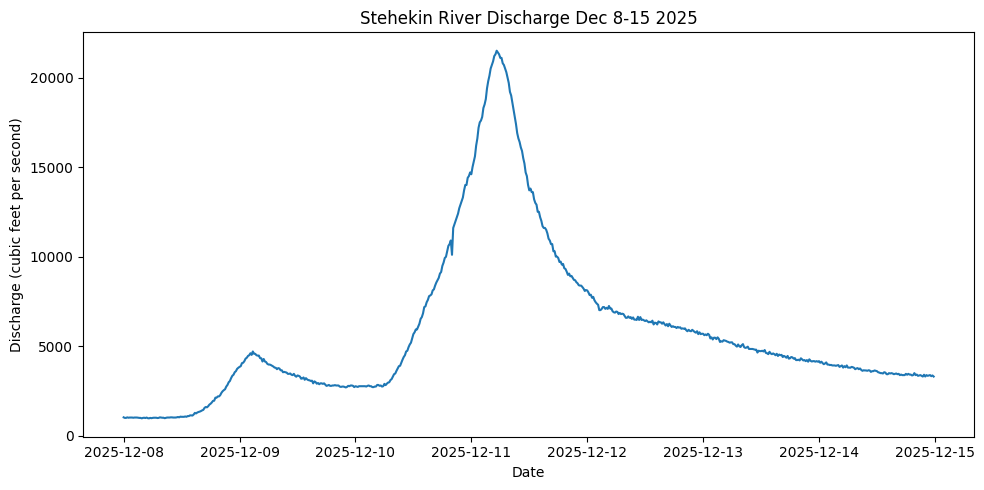

In [6]:
# API endpoint & params
url = "https://waterservices.usgs.gov/nwis/iv/?format=json&sites=12451000&parameterCd=00060&startDT=2025-12-08&endDT=2025-12-14"
# Fetch
resp = requests.get(url)
resp.raise_for_status()
data = resp.json()

# Parse into DataFrame
discharge = []
for ts in data["value"]["timeSeries"]:
    site = ts["sourceInfo"]["siteCode"][0]["value"]
    name = ts["sourceInfo"]["siteName"]
    for val in ts["values"][0]["value"]:
        discharge.append({
            "site": site,
            "name": name,
            "datetime": val["dateTime"],
            "discharge_cfs": float(val["value"])
        })

df = pd.DataFrame(discharge)
df["datetime"] = pd.to_datetime(df["datetime"])

plt.figure(figsize=(10, 5))
plt.plot(df["datetime"], df["discharge_cfs"])
plt.title("Stehekin River Discharge Dec 8-15 2025")
plt.xlabel("Date")
plt.ylabel("Discharge (cubic feet per second)")
plt.tight_layout()
plt.show()
